In [1]:
using CSV, DataFrames
using Statistics, HypothesisTests
using Plots
using StatsPlots

In [2]:
df_x = DataFrame(CSV.File("weights/county_X.csv"))[:, ["COUNTY", "1"]]
rename!(df_x, [("1" => :x)]);

In [35]:
bhd = DataFrame(CSV.File("raw_data/cdc_places/PLACES__Local_Data_for_Better_Health__County_Data_2024_release_20250523.csv"))

m = [v == "Crude prevalence" for v in bhd[:, "Data_Value_Type"]]
bhd = bhd[m,:]

m = [v == 2022 for v in bhd[:, "Year"]]
bhd = bhd[m,:]

l = [
    "Frequent physical distress among adults",
    "Stroke among adults",
    "Feeling socially isolated among adults",
    "Fair or poor self-rated health status among adults",
    "All teeth lost among adults aged >=65 years",
    "Vision disability among adults",
    "Cognitive disability among adults",
    "Frequent mental distress among adults",
    "Lack of social and emotional support among adults",
    "Mobility disability among adults",
    "Current asthma among adults",
    "Chronic obstructive pulmonary disease among adults",
    "Coronary heart disease among adults",
    "Diagnosed diabetes among adults",
    "Hearing disability among adults",
    "Depression among adults",
    "Short sleep duration among adults",
    "Obesity among adults",
]

bhd_t = unique(bhd[:, [:LocationID]])
dropmissing!(bhd_t)

for (i, v) in enumerate(l)
    m = bhd[:, :Measure] .== v
    y = bhd[m, [:LocationID, :Data_Value]]
    y = combine(groupby(y, :LocationID), :Data_Value=>first=>:Data_Value)
    dropmissing!(y)
    bhd_t = leftjoin(bhd_t, y, on=:LocationID)
    rename!(bhd_t, [(:Data_Value => v)])
end

In [36]:
ha = DataFrame(CSV.File("raw_data/Health-Atlas-data_county.csv"))

rename!(bhd_t, [(:LocationID => :COUNTY)]);
rename!(ha, [(:GEOID => :COUNTY)]);

res = outerjoin(outerjoin(bhd_t, df_x, on=:COUNTY), ha, on=:COUNTY);

In [37]:
df = DataFrame([l], ["BRFSS"])

Row,BRFSS
,String
1,Frequent physical distress among adults
2,Stroke among adults
3,Feeling socially isolated among adults
4,Fair or poor self-rated health status among adults
5,All teeth lost among adults aged >=65 years
6,Vision disability among adults
7,Cognitive disability among adults
8,Frequent mental distress among adults
9,Lack of social and emotional support among adults


In [38]:
res[:, "x"] = coalesce.(res[:, "x"], NaN)
vals = zeros(size(l))
for (i, v) in enumerate(l)
    res[:, v] = coalesce.(res[:, v], NaN)
    m = (isnan.(res[:, v]) .+ isnan.(res[:, "x"])) .== 0
    vals[i] = cor(res[m, "x"], res[m, v])
    println(cor(res[m, "x"], res[m, v]), "  ", v)
end

df[!, "x"] = vals;

0.7875413820344593  Frequent physical distress among adults
0.7728860244117373  Stroke among adults
0.32548186685275354  Feeling socially isolated among adults
0.7890139357979524  Fair or poor self-rated health status among adults
0.7108136026761291  All teeth lost among adults aged >=65 years
0.7366740105051253  Vision disability among adults
0.6907126196324244  Cognitive disability among adults
0.5641360799129131  Frequent mental distress among adults
0.4826832342160009  Lack of social and emotional support among adults
0.8015365875523164  Mobility disability among adults
0.45116801857893407  Current asthma among adults
0.7293952163291579  Chronic obstructive pulmonary disease among adults
0.6403037407339806  Coronary heart disease among adults
0.766110302089053  Diagnosed diabetes among adults
0.5263567120471422  Hearing disability among adults
0.2652117833933601  Depression among adults
0.5929461723889137  Short sleep duration among adults
0.6045255160889328  Obesity among adults


In [39]:
res[:, "ndi"] = coalesce.(res[:, "ndi"], NaN)
vals = zeros(size(l))
for (i, v) in enumerate(l)
    res[:, v] = coalesce.(res[:, v], NaN)
    m = (isnan.(res[:, v]) .+ isnan.(res[:, "ndi"])) .== 0
    vals[i] = cor(res[m, "ndi"], res[m, v])
    println(cor(res[m, "ndi"], res[m, v]), "  ", v)
end

df[!, "ndi"] = vals;

0.6408389942338959  Frequent physical distress among adults
0.5480487558042543  Stroke among adults
0.5620418032354128  Feeling socially isolated among adults
0.7485294769501496  Fair or poor self-rated health status among adults
0.7017618178436107  All teeth lost among adults aged >=65 years
0.8061495129563317  Vision disability among adults
0.7441450665154202  Cognitive disability among adults
0.6766375326441637  Frequent mental distress among adults
0.6947939000926003  Lack of social and emotional support among adults
0.6152500025001766  Mobility disability among adults
0.46592089929322233  Current asthma among adults
0.42701331859774877  Chronic obstructive pulmonary disease among adults
0.23195992918697056  Coronary heart disease among adults
0.6123229820406411  Diagnosed diabetes among adults
0.17211039853725776  Hearing disability among adults
0.23303542793364923  Depression among adults
0.6616034120777492  Short sleep duration among adults
0.4845665863137637  Obesity among adul

In [40]:
res[:, "RPL_THEMES"] = coalesce.(res[:, "RPL_THEMES"], NaN)
vals = zeros(size(l))
for (i, v) in enumerate(l)
    res[:, v] = coalesce.(res[:, v], NaN)
    m = (isnan.(res[:, v]) .+ isnan.(res[:, "RPL_THEMES"])) .== 0
    vals[i] = cor(res[m, "RPL_THEMES"], res[m, v])
    println(cor(res[m, "RPL_THEMES"], res[m, v]), "  ", v)
end

df[!, "svi"] = vals;

0.5553296890900971  Frequent physical distress among adults
0.4664854008073473  Stroke among adults
0.541786020475305  Feeling socially isolated among adults
0.6612191528427678  Fair or poor self-rated health status among adults
0.5729869652221785  All teeth lost among adults aged >=65 years
0.7276242335533878  Vision disability among adults
0.6493231150006578  Cognitive disability among adults
0.5727079763687551  Frequent mental distress among adults
0.6775673199112706  Lack of social and emotional support among adults
0.5413013604670259  Mobility disability among adults
0.3260927178640667  Current asthma among adults
0.3238361851883741  Chronic obstructive pulmonary disease among adults
0.1979122259992857  Coronary heart disease among adults
0.5365492391132792  Diagnosed diabetes among adults
0.1575821592245347  Hearing disability among adults
0.17270802017476372  Depression among adults
0.5605719925367558  Short sleep duration among adults
0.3348178342520181  Obesity among adults


In [41]:
OneSampleTTest(df[!, "ndi"], df[!, "svi"] )

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.0805738
    95% confidence interval: (0.06075, 0.1004)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-06

Details:
    number of observations:   18
    t-statistic:              8.573430888072187
    degrees of freedom:       17
    empirical standard error: 0.009398080001132863


In [42]:
OneSampleTTest(df[!, "x"], df[!, "svi"] )

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.147839
    95% confidence interval: (0.05512, 0.2406)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           0.0037

Details:
    number of observations:   18
    t-statistic:              3.364135948952297
    degrees of freedom:       17
    empirical standard error: 0.04394549575497928


In [43]:
OneSampleTTest(df[!, "x"], df[!, "ndi"] )

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.0672648
    95% confidence interval: (-0.02427, 0.1588)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.1395

Details:
    number of observations:   18
    t-statistic:              1.5503477085345387
    degrees of freedom:       17
    empirical standard error: 0.04338693334616677


In [44]:
df[!, "x"] .- df[!, "ndi"]

18-element Vector{Float64}:
  0.14670238780056344
  0.224837268607483
 -0.2365599363826592
  0.04048445884780283
  0.00905178483251845
 -0.06947550245120648
 -0.053432446882995865
 -0.11250145273125056
 -0.21211066587659944
  0.1862865850521398
 -0.014752880714288263
  0.30238189773140917
  0.40834381154701
  0.1537873200484119
  0.35424631350988445
  0.03217635545971087
 -0.06865723968883553
  0.11995892977516909

In [45]:
df[!, "ndi"] .- df[!, "svi"]

18-element Vector{Float64}:
 0.08550930514379884
 0.08156335499690698
 0.020255782760107754
 0.08731032410738182
 0.12877485262143218
 0.07852527940294396
 0.09482195151476247
 0.10392955627540856
 0.01722658018132972
 0.07394864203315066
 0.13982818142915565
 0.10317713340937468
 0.03404770318768485
 0.07577374292736183
 0.014528239312723068
 0.06032740775888551
 0.10103141954099337
 0.1497487520617456

In [46]:
df[!, "x"] .- df[!, "svi"]

18-element Vector{Float64}:
  0.23221169294436228
  0.30640062360438997
 -0.21630415362255145
  0.12779478295518465
  0.13782663745395063
  0.009049776951737476
  0.041389504631766605
 -0.008571896455841999
 -0.19488408569526972
  0.26023522708529045
  0.1250753007148674
  0.40555903114078384
  0.44239151473469485
  0.22956106297577372
  0.3687745528226075
  0.09250376321859638
  0.03237417985215785
  0.2697076818369147

In [47]:
df

Row,BRFSS,x,ndi,svi
,String,Float64,Float64,Float64
1,Frequent physical distress among adults,0.787541,0.640839,0.55533
2,Stroke among adults,0.772886,0.548049,0.466485
3,Feeling socially isolated among adults,0.325482,0.562042,0.541786
4,Fair or poor self-rated health status among adults,0.789014,0.748529,0.661219
5,All teeth lost among adults aged >=65 years,0.710814,0.701762,0.572987
6,Vision disability among adults,0.736674,0.80615,0.727624
7,Cognitive disability among adults,0.690713,0.744145,0.649323
8,Frequent mental distress among adults,0.564136,0.676638,0.572708
9,Lack of social and emotional support among adults,0.482683,0.694794,0.677567


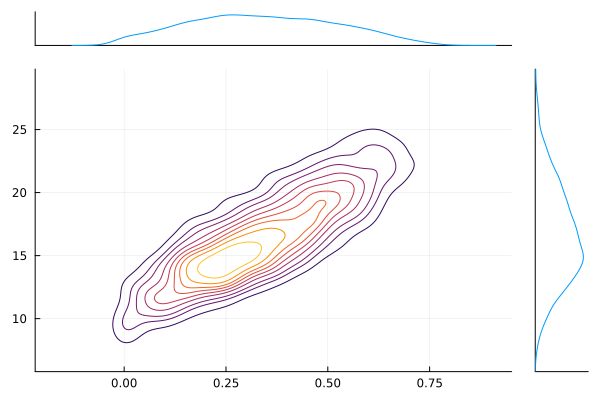

In [48]:
#plot(res[:, "x"], res[:, "Depression among adults"], seriestype=:scatter, label="data")
col = "Mobility disability among adults"
m = (isnan.(res[:, col]) .+ isnan.(res[:, "x"])) .== 0
marginalkde([v for v in res[m,"x"]], [v for v in res[m,col]])

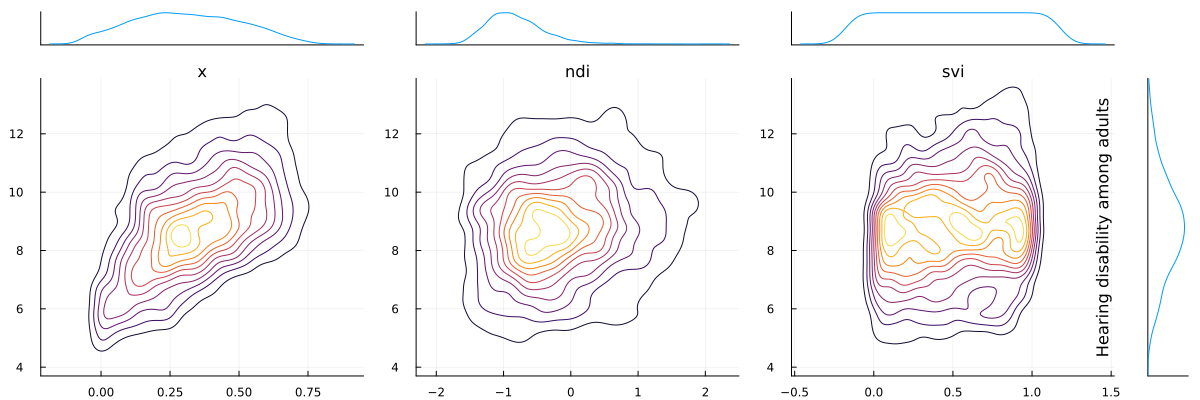

In [49]:
using KernelDensity

col = "Hearing disability among adults"

l = @layout [w1 x1 y1 _; w2{0.32w,0.9h} x2{0.32w,0.9h} y2{0.32w,0.9h} z2]

m = (isnan.(res[:, col]) .+ isnan.(res[:, "x"])) .== 0
x = [v for v in res[m,"x"]]
y = [v for v in res[m,col]]

m_x = median(x)
dx_l = m_x - quantile(x, 0.16)
dx_h = quantile(x, 0.84) - m_x
xmin = m_x  - 3 * dx_l
xmax = m_x + 3 * dx_h

m_y = median(y)
dy_l = m_y - quantile(y, 0.16)
dy_h = quantile(y, 0.84) - m_y
ymin = m_y - 3 * dy_l
ymax = m_y + 3 * dy_h

yl = minimum(y)-5
yh = maximum(y)+5
ky = KernelDensity.kde(y)
p_z2 = density(y, orientation=:h, ylims=(ymin, ymax), xlims=(0, 1.1 * maximum(ky.density)), legend=false,  ticks=nothing, xguide="", yguide="", ylabel=col)
p_w1 = density(x, legend=false, ticks=nothing, xguide="", yguide="", xlabel="x")
k = kde((x, y))
p_w2 = contour(collect(k.x), collect(k.y), k.density', colorbar=false, levels=10, ylims=(ymin, ymax), xlims=(xmin, xmax))

m = (isnan.(res[:, col]) .+ isnan.(res[:, "ndi"])) .== 0
x = [v for v in res[m,"ndi"]]
y = [v for v in res[m,col]]
m_x = median(x)
dx_l = m_x - quantile(x, 0.16)
dx_h = quantile(x, 0.84) - m_x
xmin = m_x  - 3 * dx_l
xmax = m_x + 3 * dx_h
p_x1 = density(x, legend=false, ticks=nothing, xguide="", yguide="", xlabel="ndi")
k = kde((x, y))
p_x2 = contour(collect(k.x), collect(k.y), k.density', colorbar=false, levels=10, ylims=(ymin, ymax), xlims=(xmin, xmax))

m = (isnan.(res[:, col]) .+ isnan.(res[:, "RPL_THEMES"])) .== 0
x = [v for v in res[m,"RPL_THEMES"]]
y = [v for v in res[m,col]]
m_x = median(x)
dx_l = m_x - quantile(x, 0.16)
dx_h = quantile(x, 0.84) - m_x
xmin = m_x  - 3 * dx_l
xmax = m_x + 3 * dx_h
p_y1 = density(x, legend=false, ticks=nothing, xguide="", yguide="", xlabel="svi")
k = kde((x, y))
p_y2 = contour(collect(k.x), collect(k.y), k.density', colorbar=false, levels=10, ylims=(ymin, ymax), xlims=(xmin, xmax))

plot(p_w1, p_x1, p_y1, p_w2, p_x2, p_y2, p_z2, 
    layout = l, 
    size=(1200,400))

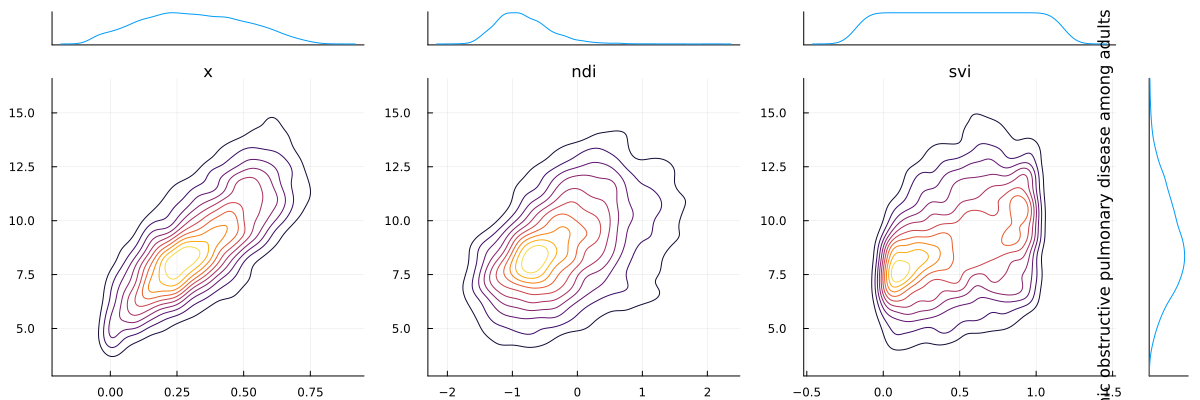

In [50]:
col = "Chronic obstructive pulmonary disease among adults"

l = @layout [w1 x1 y1 _; w2{0.32w,0.9h} x2{0.32w,0.9h} y2{0.32w,0.9h} z2]

m = (isnan.(res[:, col]) .+ isnan.(res[:, "x"])) .== 0
x = [v for v in res[m,"x"]]
y = [v for v in res[m,col]]

m_x = median(x)
dx_l = m_x - quantile(x, 0.16)
dx_h = quantile(x, 0.84) - m_x
xmin = m_x  - 3 * dx_l
xmax = m_x + 3 * dx_h

m_y = median(y)
dy_l = m_y - quantile(y, 0.16)
dy_h = quantile(y, 0.84) - m_y
ymin = m_y - 3 * dy_l
ymax = m_y + 3 * dy_h

yl = minimum(y)-5
yh = maximum(y)+5
ky = KernelDensity.kde(y)
p_z2 = density(y, orientation=:h, ylims=(ymin, ymax), xlims=(0, 1.1 * maximum(ky.density)), legend=false,  ticks=nothing, xguide="", yguide="", ylabel=col)
p_w1 = density(x, legend=false, ticks=nothing, xguide="", yguide="", xlabel="x")
k = kde((x, y))
p_w2 = contour(collect(k.x), collect(k.y), k.density', colorbar=false, levels=10, ylims=(ymin, ymax), xlims=(xmin, xmax))

m = (isnan.(res[:, col]) .+ isnan.(res[:, "ndi"])) .== 0
x = [v for v in res[m,"ndi"]]
y = [v for v in res[m,col]]
m_x = median(x)
dx_l = m_x - quantile(x, 0.16)
dx_h = quantile(x, 0.84) - m_x
xmin = m_x  - 3 * dx_l
xmax = m_x + 3 * dx_h
p_x1 = density(x, legend=false, ticks=nothing, xguide="", yguide="", xlabel="ndi")
k = kde((x, y))
p_x2 = contour(collect(k.x), collect(k.y), k.density', colorbar=false, levels=10, ylims=(ymin, ymax), xlims=(xmin, xmax))

m = (isnan.(res[:, col]) .+ isnan.(res[:, "RPL_THEMES"])) .== 0
x = [v for v in res[m,"RPL_THEMES"]]
y = [v for v in res[m,col]]
m_x = median(x)
dx_l = m_x - quantile(x, 0.16)
dx_h = quantile(x, 0.84) - m_x
xmin = m_x  - 3 * dx_l
xmax = m_x + 3 * dx_h
p_y1 = density(x, legend=false, ticks=nothing, xguide="", yguide="", xlabel="svi")
k = kde((x, y))
p_y2 = contour(collect(k.x), collect(k.y), k.density', colorbar=false, levels=10, ylims=(ymin, ymax), xlims=(xmin, xmax))

plot(p_w1, p_x1, p_y1, p_w2, p_x2, p_y2, p_z2, 
    layout = l, 
    size=(1200,400))

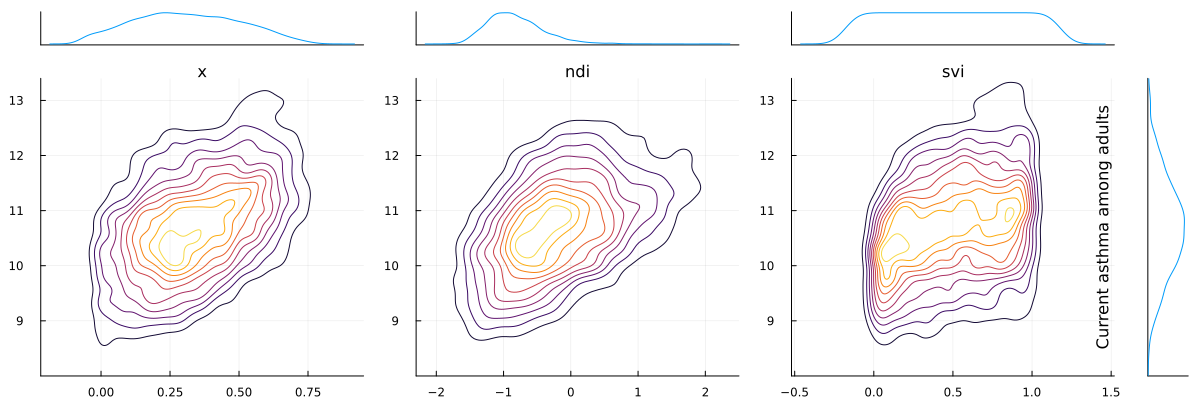

In [51]:
col = "Current asthma among adults"

l = @layout [w1 x1 y1 _; w2{0.32w,0.9h} x2{0.32w,0.9h} y2{0.32w,0.9h} z2]

m = (isnan.(res[:, col]) .+ isnan.(res[:, "x"])) .== 0
x = [v for v in res[m,"x"]]
y = [v for v in res[m,col]]

m_x = median(x)
dx_l = m_x - quantile(x, 0.16)
dx_h = quantile(x, 0.84) - m_x
xmin = m_x  - 3 * dx_l
xmax = m_x + 3 * dx_h

m_y = median(y)
dy_l = m_y - quantile(y, 0.16)
dy_h = quantile(y, 0.84) - m_y
ymin = m_y - 3 * dy_l
ymax = m_y + 3 * dy_h

yl = minimum(y)-5
yh = maximum(y)+5
ky = KernelDensity.kde(y)
p_z2 = density(y, orientation=:h, ylims=(ymin, ymax), xlims=(0, 1.1 * maximum(ky.density)), legend=false,  ticks=nothing, xguide="", yguide="", ylabel=col)
p_w1 = density(x, legend=false, ticks=nothing, xguide="", yguide="", xlabel="x")
k = kde((x, y))
p_w2 = contour(collect(k.x), collect(k.y), k.density', colorbar=false, levels=10, ylims=(ymin, ymax), xlims=(xmin, xmax))

m = (isnan.(res[:, col]) .+ isnan.(res[:, "ndi"])) .== 0
x = [v for v in res[m,"ndi"]]
y = [v for v in res[m,col]]
m_x = median(x)
dx_l = m_x - quantile(x, 0.16)
dx_h = quantile(x, 0.84) - m_x
xmin = m_x  - 3 * dx_l
xmax = m_x + 3 * dx_h
p_x1 = density(x, legend=false, ticks=nothing, xguide="", yguide="", xlabel="ndi")
k = kde((x, y))
p_x2 = contour(collect(k.x), collect(k.y), k.density', colorbar=false, levels=10, ylims=(ymin, ymax), xlims=(xmin, xmax))

m = (isnan.(res[:, col]) .+ isnan.(res[:, "RPL_THEMES"])) .== 0
x = [v for v in res[m,"RPL_THEMES"]]
y = [v for v in res[m,col]]
m_x = median(x)
dx_l = m_x - quantile(x, 0.16)
dx_h = quantile(x, 0.84) - m_x
xmin = m_x  - 3 * dx_l
xmax = m_x + 3 * dx_h
p_y1 = density(x, legend=false, ticks=nothing, xguide="", yguide="", xlabel="svi")
k = kde((x, y))
p_y2 = contour(collect(k.x), collect(k.y), k.density', colorbar=false, levels=10, ylims=(ymin, ymax), xlims=(xmin, xmax))

plot(p_w1, p_x1, p_y1, p_w2, p_x2, p_y2, p_z2, 
    layout = l, 
    size=(1200,400))